# Task 3
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import padasip as pa
import numpy as np
from numpy.random import default_rng
rng = default_rng(257) # seed

In [165]:
!wget --recursive --no-parent -nd -c https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/ -P ./data/

--2021-02-21 15:58:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Loading robots.txt; please ignore errors.
--2021-02-21 15:58:15--  https://archive.ics.uci.edu/robots.txt
Reusing existing connection to archive.ics.uci.edu:443.
HTTP request sent, awaiting response... 404 Not Found
2021-02-21 15:58:15 ERROR 404: Not Found.

--2021-02-21 15:58:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/Index
Reusing existing connection to archive.ics.uci.edu:443.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2021-02-21 15:58:16--  https://archive.ics.uci.edu

In [166]:
df = pd.read_csv('data/machine.data', names=['vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'])
df

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [167]:
X = df.drop(columns=['vendor name', 'Model Name', 'PRP', 'ERP']).to_numpy()
y = df['PRP'].to_numpy()

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # standardise X

N = X.shape[0] # number of data
p = X.shape[1] # number of features

In [168]:
w_closed = np.linalg.inv(X.T @ X) @ X.T @ y
y_closed = X @ w_closed


In [169]:
w_sgd = rng.random(p)
learning_rate_sgd = 1e-3
maxIter_sgd = 5000
iterError_sgd = np.zeros(maxIter_sgd)

for i in range(maxIter_sgd):
    j = rng.integers(low=0, high=y.shape[0])
    x_iter = X[j] # random sample of X
    y_iter = y[j] # random sample of Y

    error_diff_sgd = -(y_iter - w_sgd.T@x_iter) * x_iter # derivative of error
    w_sgd -= learning_rate_sgd * error_diff_sgd # sgd update
    iterError_sgd[i] = (y - X@w_sgd).T @ (y - X@w_sgd) # error
    

y_sgd = X @ w_sgd

In [170]:
iterError_sgd[-1]

3119585.192180632

Text(0.5, 1.0, 'Stochastic Gradient Descent on Computer Hardware Dataset')

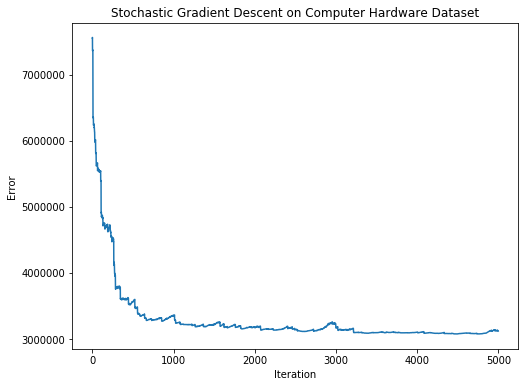

In [182]:
fig_sgd_iterError = plt.figure(figsize=(8,6))
plt.plot(iterError_sgd)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Stochastic Gradient Descent on Computer Hardware Dataset')

In [183]:
fig_sgd_iterError.savefig('report/Figures/uci_sgd_iterError.pdf')

In [317]:
w_rls = np.zeros((p, 1))
lambda_rls = 0.98
delta = 1
P = delta * np.identity(p)
iterError_rls = np.zeros(y.shape[0])

for i, (x_n, y_n) in enumerate(zip(X, y)):
    x_n = x_n.reshape(-1, 1)

    error = y_n - x_n.T @ w_rls
    k_n = P @ x_n * 1/(lambda_rls + x_n.T @ P @ x_n)
    P = ((1/lambda_rls)*P - k_n @ x_n.T @ ((1/lambda_rls)*P))
    w_rls += k_n * error
    iterError_rls[i] = (y_n - x_n.T @ w_rls)**2

iterError_rls = np.abs(iterError_rls)
    
w_rls = w_rls.flatten()
y_rls = X @ w_rls
y_rls = y_rls.flatten()

In [318]:
iterError_rls[-1]

31794.519063993248

Text(0.5, 1.0, 'Recursive Least Squares on Computer Hardware Dataset')

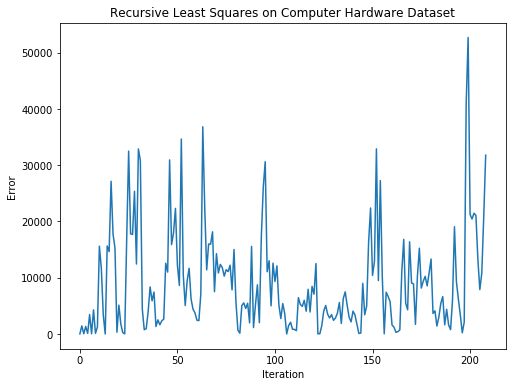

In [319]:
fig_rls_iterError = plt.figure(figsize=(8,6))
plt.plot(iterError_rls)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Recursive Least Squares on Computer Hardware Dataset')

In [320]:
fig_rls_iterError.savefig('report/Figures/uci_rls_iterError.pdf')

# Task 4

In [322]:
f = pa.filters.FilterRLS(n=X.shape[1], mu=0.98, eps=1, w="zeros")
y_pa, iterError_pa, w_pa = f.run(y, X)
iterError_pa = iterError_pa**2
w_pa = w_pa[-1]

In [323]:
iterError_pa[-1]

27997.546687302733

Text(0.5, 1.0, 'Recursive Least Squares with Padasip on Computer Hardware Dataset')

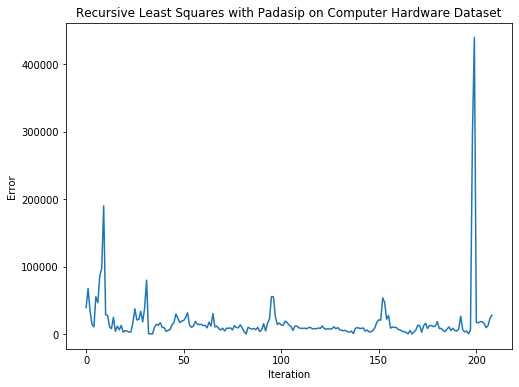

In [324]:
fig_pa_iterError = plt.figure(figsize=(8,6))
plt.plot(iterError_pa)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Recursive Least Squares with Padasip on Computer Hardware Dataset')

In [325]:
fig_pa_iterError.savefig('report/Figures/uci_pa_iterError.pdf')

In [326]:
df_y = pd.DataFrame(data={'y': y, 'y_closed': y_closed, 'y_sgd': y_sgd, 'y_rls': y_rls, 'y_pa': y_pa})
y_corr = df_y.corr(method='pearson')
y_corr

,y,y_closed,y_sgd,y_rls,y_pa
y,1.000000,0.929995,0.927807,0.891165,0.906713
y_closed,0.929995,1.000000,0.997647,0.958247,0.951449
y_sgd,0.927807,0.997647,1.000000,0.955024,0.961128
y_rls,0.891165,0.958247,0.955024,1.000000,0.910535
y_pa,0.906713,0.951449,0.961128,0.910535,1.000000


In [328]:
df_w = pd.DataFrame(data={'w_closed': w_closed, 'w_sgd': w_sgd, 'w_rls': w_rls, 'w_pa': w_pa})
w_corr = df_w.corr(method='pearson')
w_corr

,w_closed,w_sgd,w_rls,w_pa
w_closed,1.000000,0.974922,0.740187,0.733201
w_sgd,0.974922,1.000000,0.711926,0.844386
w_rls,0.740187,0.711926,1.000000,0.575724
w_pa,0.733201,0.844386,0.575724,1.000000


In [329]:
df = pd.concat((y_corr['y'], w_corr['w_closed']), axis=1)
df

,y,w_closed
y,1.000000,NaN
y_closed,0.929995,NaN
y_sgd,0.927807,NaN
y_rls,0.891165,NaN
y_pa,0.906713,NaN
w_closed,NaN,1.000000
w_sgd,NaN,0.974922
w_rls,NaN,0.740187
w_pa,NaN,0.733201


In [332]:
# df.to_csv('corr_uci.csv')

In [333]:
df_corr = pd.read_csv('corr_uci.csv', index_col=0)
df_corr

,y,w_closed
Ground Truth,1.000000,NaN
Closed Form,0.929995,1.000000
SGD,0.927807,0.974922
RLS,0.891165,0.740187
RLS Padasip,0.906713,0.733201


In [335]:
print(df_corr.to_latex(caption='Table of correlation against ground truth on Computer Hardware Dataset.', label="tab:task3_corr"))

\begin{table}
\centering
\caption{Table of correlation against ground truth on Computer Hardware Dataset.}
\label{tab:task3_corr}
\begin{tabular}{lrr}
\toprule
{} &         y &  w\_closed \\
\midrule
Ground Truth &  1.000000 &       NaN \\
Closed Form  &  0.929995 &  1.000000 \\
SGD          &  0.927807 &  0.974922 \\
RLS          &  0.891165 &  0.740187 \\
RLS Padasip  &  0.906713 &  0.733201 \\
\bottomrule
\end{tabular}
\end{table}

